<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%203/Decision_Tree_CreditDataset_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving CreditDataset.csv to CreditDataset.csv


In [3]:
# Load dataset
dataset = pd.read_csv('CreditDataset.csv')

In [8]:
# Cek tipe data
print(dataset.dtypes)

x1       object
x2        int64
x3       object
x4       object
x5        int64
x6       object
x7       object
x8        int64
x9       object
x10      object
x11       int64
x12      object
x13       int64
x14      object
x15      object
x16       int64
x17      object
x18       int64
x19      object
x20      object
Class     int64
dtype: object


In [10]:
# Memisahkan features dan target (asumsikan kolom terakhir adalah target)
X = dataset_encoded.iloc[:, :-1]  # semua kolom kecuali kolom terakhir
y = dataset_encoded.iloc[:, -1]   # kolom terakhir sebagai target

In [11]:
# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Membuat model Decision Tree
model = DecisionTreeClassifier()

In [13]:
# Melatih model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Prediksi pada data testing
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # untuk ROC dan AUC

In [15]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [16]:
# Metrik Evaluasi
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("ROC AUC: ", roc_auc)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
ROC AUC:  1.0


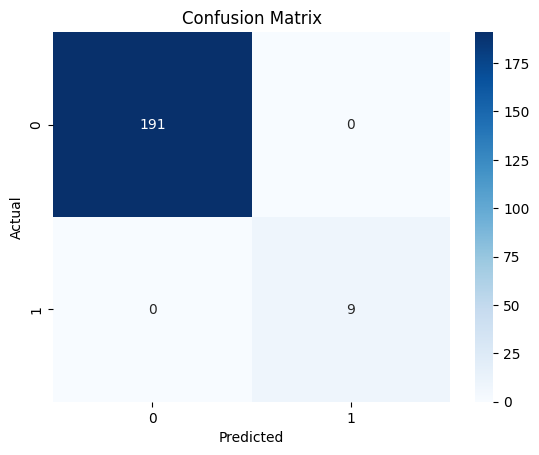

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

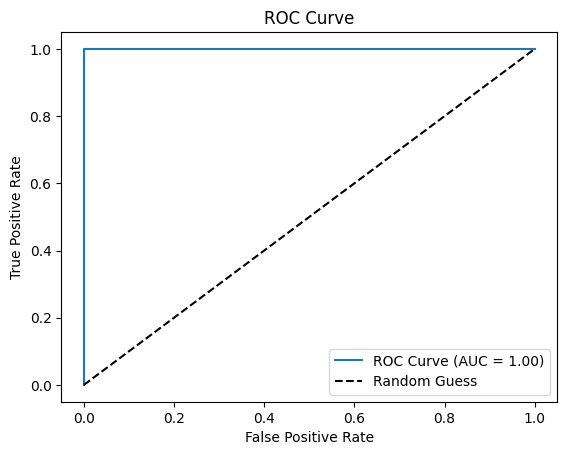

In [18]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()